# WB1 - Data Cleaning

## Table of Contents

* [1. Overview of the Dataset](#Overview)
* [2. Data Cleaning](#Cleaning)
    * [Removing Variables](#Removing)
    * [Missing Values](#Missing)
    * [Outliers](#Outliers)
* [3. Data Pre-Processing](#Processing)
    * [Data Transformation](#Transformation)
    * [Feature Engineering](#Engineering)
* [Save Cleaned Data to CSV](#Save)

# 1. Overview of the Dataset<a class="anchor" id="Overview"></a>

First, we import the necessary libraries and load the datasets into our code.

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

Two datasets were provided by Onelivery, who extracted information from MySQL on an order-level basis, with each row representing a single order. Note that a single order may still contain one or multiple packages and dropoffs. The time scope of the datasets ranges from the launch of their service on 15th June 2021 to the most recently updated data on 26th May 2023. Overall, the data encompasses over 3300 individual orders.

In [2]:
# Load the first dataset into a pandas DataFrame
df1 = pd.read_csv('Order Metrics.csv')
df1.head()

,orderID,businessType,dateOnly,timeOnly,confirmationDateOnly,confirmationTimeOnly,packageCategoryName,packageName,packageDimensions,numberOfDropoffs,...,driverName,addressOfSenderID,scheduledDateOnly,scheduledTimeOnly,isEcoDelivery,isExpressDelivery,isScheduledDelivery,isDeliveredOnTime,isCourierOrder,isMultidropCourierOrder
0,1014,NaN,2021-06-15,09:49:54,2021-06-15,09:54:35,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,cd9b0e63abd649738acce5ee56ce7459,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,1015,NaN,2021-06-15,14:45:32,2021-06-15,14:48:23,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,dfec9073b8be4fe3a7920d7a5fd41cad,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,1016,NaN,2021-06-15,15:48:21,2021-06-15,15:53:22,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,035bbaec6602452fab7873160b22e652,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,1017,NaN,2021-06-15,16:56:03,2021-06-15,17:04:38,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,d57ae057d5f44685bb69138c0c6f800a,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1018,NaN,2021-06-16,09:55:02,2021-06-16,09:57:54,customers,Regular,Length/Width/Height -- 20cm/10cm/10cm,1,...,NaN,6c22e52af7114d118cc66846d0560177,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [3]:
df1.shape

(3322, 53)

The first dataset, df1, contains various columns with information related to order metrics such as orderID, businessType, dateOnly, timeOnly, confirmationDateOnly, confirmationTimeOnly, packageCategoryName, packageName, packageDimensions, numberOfDropoffs, and many others.

In [4]:
# Load the second dataset into a pandas DataFrame
df2 = pd.read_csv('All Orders.csv')
df2.head()

,orderID,orderFulfillmentDate,orderFulfillmentMonth,dropoffs,returns,packages,subtotalAmount,collectionDurationInMinutes,differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes,orderDurationInMinutes,estimatedDistance,rider,businessName,senderAddress,driverUserID
0,4663,26-May-23,May,11,1,12,2647.0,4.0,74,78.0,7.0,9dab1279c1be47dfae91474a9da9cf84,Novapharma Limited T/ANorth End Pharmacy,"100A, North End Pharmacy, North End Road, W14 9EX",9dab1279c1be47dfae91474a9da9cf84
1,4661,25-May-23,May,1,0,1,1350.0,4.0,37,41.0,7.5,da83aa974a4d40cc9b0318cc37579ff1,Pearl Chemist Ltd,"Pharmacy Dept, St George's Hospital, Blackshaw...",da83aa974a4d40cc9b0318cc37579ff1
2,4660,25-May-23,May,0,0,0,619.0,NaN,19,NaN,3.0,da83aa974a4d40cc9b0318cc37579ff1,(SINGLE DROP),"345, , Fulham Road, SW10 9TW",da83aa974a4d40cc9b0318cc37579ff1
3,4659,25-May-23,May,0,0,0,619.0,NaN,23,NaN,3.0,da83aa974a4d40cc9b0318cc37579ff1,(SINGLE DROP),"345, , Fulham Road, SW10 9TW",da83aa974a4d40cc9b0318cc37579ff1
4,4658,25-May-23,May,4,0,4,1400.0,1.0,44,45.0,2.6,9f329876457d41f9843e587d58be5c47,POLYPHARM LTD t/a MANSONS PHARMACY,"195, Mansons Chemist, Mansons Chemist Wandswor...",9f329876457d41f9843e587d58be5c47


In [5]:
df2.shape

(3322, 15)

The second dataset, df2, provides additional details about the order fulfillment process, including columns such as orderID, orderFulfillmentDate, orderFulfillmentMonth, dropoffs, returns, packages, subtotalAmount, collectionDurationInMinutes, differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes, estimatedDistance, rider, businessName, senderAddress, and driverUserID.

The first step is to merge these two datasets. Although some columns are identical, there are is some additional data provided in df2 that we want to merge with df1. The additional columns we wish to merge with the first dataset are as follows:

- Dropoffs
- Returns
- senderAddress

The following columns were found to either already be present in the first dataframe or not provide any additional value:

- orderFulfillmentDate
- orderFulfillmentMonth
- subtotalAmount
- collectionDurationinMinutes
- differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes
- orderDurationinMinutes
- estimatedDistance
- rider
- businessName
- driverUserID

The we can merge these two datasets by using the common column 'orderID' to create a new DataFrame named df. By merging the two datasets, we aim to combine the information from both sources and obtain a comprehensive overview of the data.

In [6]:
df1.head().to_csv('dataset1_head.csv', index=False)
df2.head().to_csv('dataset2_head.csv', index=False)

In [7]:
# merge df1 with specified columns from df2
df = pd.merge(df1, df2[['orderID', 'returns','dropoffs','senderAddress']], on='orderID')
df.head()

,orderID,businessType,dateOnly,timeOnly,confirmationDateOnly,confirmationTimeOnly,packageCategoryName,packageName,packageDimensions,numberOfDropoffs,...,scheduledTimeOnly,isEcoDelivery,isExpressDelivery,isScheduledDelivery,isDeliveredOnTime,isCourierOrder,isMultidropCourierOrder,returns,dropoffs,senderAddress
0,1014,NaN,2021-06-15,09:49:54,2021-06-15,09:54:35,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
1,1015,NaN,2021-06-15,14:45:32,2021-06-15,14:48:23,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
2,1016,NaN,2021-06-15,15:48:21,2021-06-15,15:53:22,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
3,1017,NaN,2021-06-15,16:56:03,2021-06-15,17:04:38,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
4,1018,NaN,2021-06-16,09:55:02,2021-06-16,09:57:54,customers,Regular,Length/Width/Height -- 20cm/10cm/10cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, earls court chemist, Earls Court Road, SW..."


In [8]:
df.head()

,orderID,businessType,dateOnly,timeOnly,confirmationDateOnly,confirmationTimeOnly,packageCategoryName,packageName,packageDimensions,numberOfDropoffs,...,scheduledTimeOnly,isEcoDelivery,isExpressDelivery,isScheduledDelivery,isDeliveredOnTime,isCourierOrder,isMultidropCourierOrder,returns,dropoffs,senderAddress
0,1014,NaN,2021-06-15,09:49:54,2021-06-15,09:54:35,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
1,1015,NaN,2021-06-15,14:45:32,2021-06-15,14:48:23,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
2,1016,NaN,2021-06-15,15:48:21,2021-06-15,15:53:22,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
3,1017,NaN,2021-06-15,16:56:03,2021-06-15,17:04:38,businesses,Regular shopping bag,Length/Width/Height -- 50cm/40cm/25cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, Earls Court Chemist, Earls Court Road, SW..."
4,1018,NaN,2021-06-16,09:55:02,2021-06-16,09:57:54,customers,Regular,Length/Width/Height -- 20cm/10cm/10cm,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,"240, earls court chemist, Earls Court Road, SW..."


In [9]:
df.to_csv('merged_data.csv', index=False)

The merged DataFrame, df, now contains all the columns from both datasets, ensuring that relevant data from df2 is included alongside the original information from df1.

To get a better understanding of the dataset, we check the shape and info of the merged DataFrame to determine the number of rows, columns, and data types.

In [10]:
df.shape

(3322, 56)

Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 0 to 3321
Data columns (total 56 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   orderID                                                        3322 non-null   int64  
 1   businessType                                                   2937 non-null   object 
 2   dateOnly                                                       3322 non-null   object 
 3   timeOnly                                                       3322 non-null   object 
 4   confirmationDateOnly                                           3321 non-null   object 
 5   confirmationTimeOnly                                           3321 non-null   object 
 6   packageCategoryName                                            1641 non-null   object 
 7   packageName                                                 

The merged DataFrame, df, consists of 3322 rows and 56 columns, with a combination of integer, float, and object data types. The columns provide various details related to order characteristics, package information, delivery times, business details, and other relevant metrics. Understanding the data types is essential for further data processing and analysis.

# 2. Data Cleaning<a class="anchor" id="Cleaning"></a>

Data cleaning is a crucial process that involves treating missing values, data errors, inconsistencies, and redundant data. This helps remove or mitigate potential sources of invalid or misleading information, which enhances data quality, a key factor in determining the validity and reliability of the data.

## Removing Variables<a class="anchor" id="Removing"></a>

In this step, we identify and remove redundant variables that do not contribute unique or meaningful information to our analysis.

Firstly, the company indicated some orders were placed as test orders which can be identified by the addressOfSender values. Those with the following addresses can therefore be removed:

- Kings Chelsea Estates, 552, Mathison House King's Road, London, Greater London, SW10 0RR, United Kingdom of Great Britain and Northern Ireland
- Onelivery, 552, King's Road, London, SW10 0RE, U.K.,
- Kings, 552, King's Road, London, SW10 0RR, U.K.
- Onelivery, 123, this is the street address, London, W11 1LA

In [12]:
# specify the list of values to drop
values_to_drop = ['Kings Chelsea Estates, 552, Mathison House King\'s Road, London, Greater London, SW10 0RR, United Kingdom of Great Britain and Northern Ireland', 'Onelivery, 552, King\'s Road, London, SW10 0RE, U.K.', 'Kings, 552, King\'s Road, London, SW10 0RR, U.K.', 'Onelivery, 123, this is the street address, London, W11 1LA,']

# drop the rows that contain any of the specified values in 'addressOfSender' column
df = df[~df['addressOfSender'].isin(values_to_drop)]

All the various internally-generated ‘ID’ variables, so columns with 'ID', can be removed as these will not provide any additoinal value for our analysis (except for 'OrderID'):

- driverUserID
- basketID
- shippingID
- addressOfRecipientID
- userID
- driverName
- addressOfSenderID

In [13]:
# drop the specified columns
cols_to_drop_IDs = ['driverUserID', 'basketID', 'shippingID', 'addressOfRecipientID', 'userID', 'driverName', 'addressOfSenderID']
df = df.drop(columns=cols_to_drop_IDs)

For prices, we can only keep the 'grandTotalAmount' as we are not interested in the fee breakdown. The company explained that they do not make a distinction yet in the costs charged based on package size, distance, etc., which makes the breakdown of the fees unnecessary.
- processingFeeAmount
- transactionCostAmount	
- packageFeeAmount	
- tripFeeAmount	
- deliveryFeeAmount	
- serviceFeeAmount	
- subtotalAmount	
- taxAmount

In [14]:
# drop the specified columns
cols_to_drop_fees = ['processingFeeAmount', 'transactionCostAmount', 'packageFeeAmount', 'tripFeeAmount', 'deliveryFeeAmount', 'serviceFeeAmount', 'subtotalAmount', 'taxAmount']
df = df.drop(columns=cols_to_drop_fees)

Seen as we already have a lot of information in minutes regarding the time it took for each delivery to be confirmed, collected, picked up, delivered, etc., we don't need the following individual columns anymore: 
- confirmationDateOnly
- confirmationTimeOnly
- pickUpDateOnly
- pickUpTimeOnly
- deliveryDateOnly
- deliveryTimeOnly
- estimatedPickUpTimeText
- differenceBetweenOrderConfirmationAndFulfillmentTimeInMinutes

In [15]:
# drop the specified columns
cols_to_drop_date_time = ['differenceBetweenOrderConfirmationAndFulfillmentTimeInMinutes','confirmationDateOnly', 'confirmationTimeOnly', 'pickUpDateOnly','pickUpTimeOnly', 'deliveryDateOnly', 'deliveryTimeOnly', 'estimatedPickUpTimeText']
df = df.drop(columns=cols_to_drop_date_time)

For the isEcoDelivery and isExpressDelivery variables, it can be seen that these are complements (i.e., meaning that if one variable is 0, the other variable is 1). Since one variable can be derived from the other, including both variables may be redundant and might introduce multicollinearity in the modelling phase, which can affect the model's performance and interpretability.

In [16]:
# count the number of 0 and 1 values in 'isEcoDelivery' and 'isExpressDelivery' columns
eco_delivery_counts = df['isEcoDelivery'].value_counts()
express_delivery_counts = df['isExpressDelivery'].value_counts()

print("isEcoDelivery:\n", eco_delivery_counts)
print("isExpressDelivery:\n", express_delivery_counts)

isEcoDelivery:
 1.0    2671
0.0      95
Name: isEcoDelivery, dtype: int64
isExpressDelivery:
 0.0    2671
1.0      95
Name: isExpressDelivery, dtype: int64


In [17]:
# drop isEcoDelivery column (if isExpressDelivery = 0, this means it is an EcoDelivery)
df = df.drop(columns='isEcoDelivery')

## Missing Values<a class="anchor" id="Missing"></a>

Next, we address the missing values in our dataset. We identify variables with missing values and apply appropriate strategies to handle them.

The dataset contains missing values in various columns. The absolute and percentage of missing values per column is as follows:

In [18]:
# Check for missing data and sort by count (largest to smallest)
missing_counts = df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentages = (missing_counts / len(df)) * 100

# Combine missing counts and percentages into a DataFrame
missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Print the sorted missing data counts and percentages
print(missing_data)

                                                    Missing Count  \
actualDistance                                               3315   
scheduledDateOnly                                            3311   
scheduledTimeOnly                                            3311   
isDeliveredOnTime                                            2949   
packageCategoryName                                          1677   
packageName                                                  1677   
packageDimensions                                            1677   
addressOfRecipient                                           1666   
packageWeightInPounds                                        1665   
collectionDurationInMinutes                                  1650   
isMultidropCourierOrder                                      1650   
differenceBetweenCollectionStartTimeAndPickUpTi...           1650   
isScheduledDelivery                                           549   
isExpressDelivery                 

In [19]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Calculate the percentage of columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]
percentage_columns_with_missing = (len(columns_with_missing) / len(df.columns)) * 100

# Print the result
print(f"Percentage of columns with missing values: {percentage_columns_with_missing:.2f}%")

Percentage of columns with missing values: 59.38%


**actualDistance**

We can delete actualDistance because it only has missing values, i.e., the column has no values.



In [20]:
df = df.drop(columns='actualDistance')

**scheduledTimeOnly and scheduledDateOnly**

There are only a few valid values in each of these columns, so it is better to drop these columns.

In [21]:
df = df.drop(columns=['scheduledTimeOnly','scheduledDateOnly'])

**isDeliveredOnTime**

In [22]:
# count the number of 0 and 1 values in'isDeliveredOnTime' columns
count_values = df['isDeliveredOnTime'].value_counts()
print("isDeliveredOnTime:\n", count_values)

isDeliveredOnTime:
 1.0    238
0.0    128
Name: isDeliveredOnTime, dtype: int64


It seems the company wanted to try using a dummy variable for stating whether the package was delivered on time but only did so with a few orders, which isn't enough for us to investigate. So it is best to drop the column as well.

In [23]:
df = df.drop(columns='isDeliveredOnTime')

**differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes and collectionDurationInMinutes**

It seems as if these columns are the same, so let's check:

In [24]:
# check if the scheduledTimeOnly column is equal to the scheduledDateOnly column
columns_are_identical = df['differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes'].equals(df['collectionDurationInMinutes'])

# print the result
if columns_are_identical:
    print("The differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes and collectionDurationInMinutes columns are identical.")
else:
    print("The differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes and collectionDurationInMinutes columns are not identical.")

The differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes and collectionDurationInMinutes columns are identical.


In [25]:
# Let's delete differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes as this is indeed the same as CollectionDurationInMintues
df = df.drop(columns='differenceBetweenCollectionStartTimeAndPickUpTimeInMinutes')

Now, back to the missing values in the collectionDurationInMinutes column. The company explained that any null values in this column have to be considered to be 0. A lot of single-drop orders don't have a collection duration because it is an immediate process where the courrier doesn't have to collect multiple packages. Instead, these single packages are already ready for pickup by the sender.

In [26]:
# impute the null values in collectionDurationInMinutes with 0
df['collectionDurationInMinutes'] = df['collectionDurationInMinutes'].fillna(0)

**isMultidropCourierOrder**

In [27]:
# get the unique values in the isMultidropCourierOrder column
unique_values = df['isMultidropCourierOrder'].unique()
unique_values

array([nan,  1.])

This shows that even though this variable is supposed to be a dummy variable to show whether the order is a multi-drop order or not, it seems to only have '1' values. Upon further invesetigation the dummy variables also seem to be incorrect, as the '1' value (meaning multi-drop) is also occassionally assigned to orders with only a single dropoff and package. However, with the help of the company, we were also able to identify the correct multi-drop and single-drop orders through the'numberOfDropoffs' column.

In [28]:
# Replace all values with 0 if numberOfDropoffs is 1, else replace with 1
df['isMultidropCourierOrder'] = np.where(df['numberOfDropoffs'] == 1, 0, 1)

In [29]:
# get the unique values in the packageWeightInPounds column
unique_values = df['isMultidropCourierOrder'].unique()
unique_values

array([0, 1])

**packageCategoryName, packageName and packageDimensions**

The packageCategoryname, packageName, and packageDimensions columns show information on the type of package (i.e., business vs customer), size of package (i.e., envelope, small box, medium box, etc.) and the pacakge dimensions, respectively. We have no information on the null values and what they would be, but there are quite a number (namely 1677 or 50%) of missing values in these columms. So, instead we can assign these values to a new category called 'Other' in order to not loose all these data points.

In [30]:
# fill null values in 'packageCategoryName', 'packageName', and 'packageDimensions' columns with 'Other'
df['packageCategoryName'].fillna('Other', inplace=True)
df['packageName'].fillna('Other', inplace=True)
df['packageDimensions'].fillna('Other', inplace=True)

**addressOfRecipient**

There are quite a lot of missing values in the addressOfRecipient column. As we have no information about this, we can drop this column to focus on the senderAddress column instead.

In [31]:
# fill null values with 'Other'
df = df.drop(columns='addressOfRecipient')

**packageWeightInPounds**

In [32]:
# get the unique values in the packageWeightInPounds column
unique_values = df['packageWeightInPounds'].unique()
unique_values

array([ 0., nan])

As can be seen, the values in this column are either 0 and missing. Therefore, we can drop this column as it does not provide any useful information on package weights.

In [33]:
df = df.drop(columns='packageWeightInPounds')

**isExpressDelivery and isScheduledDelivery**

The first few hundred orders placed seem to have null values for the 'isExpressDelivery' and 'isScheduledDelivery' dummy variable options. This might be because this metric was only tracked or implemented later. However, as this is a dummy variable (i.e., 0 = no, 1 = yes), we cannot know what type of deliveries these first were. So let's investigate a bit more.

In [34]:
# get the unique values in the isExpressDelivery column
unique_values = df['isExpressDelivery'].unique()
unique_values

array([nan,  1.,  0.])

In [35]:
# get the unique values in the isScheduledDelivery column
unique_values = df['isScheduledDelivery'].unique()
unique_values

array([nan,  0.,  1.])

In [36]:
# count the number of 0 and 1 values in'isExpressDelivery', and 'isScheduledDelivery' columns
express_delivery_counts = df['isExpressDelivery'].value_counts()
scheduled_delivery_counts = df['isScheduledDelivery'].value_counts()

print("isExpressDelivery:\n", express_delivery_counts)
print("isScheduledDelivery:\n", scheduled_delivery_counts)

isExpressDelivery:
 0.0    2671
1.0      95
Name: isExpressDelivery, dtype: int64
isScheduledDelivery:
 0.0    2762
1.0       4
Name: isScheduledDelivery, dtype: int64


From this, it can firstly be seen that the isScheduledDelivery column only has 4 '1' (or yes) values. This is not going to be useful for our analysis so we can conclude that this column can be dropped.

In [37]:
df = df.drop(columns='isScheduledDelivery')

We still cannot infer what the missing values would be in the isExpressDelivery column. As this column only has approximately 549 missing values, the missing values can be dropped.

In [38]:
# Drop rows with missing values in the isExpressDelivery column
df.dropna(subset=['isExpressDelivery'], inplace=True)

**isCourierOrder**

In [39]:
# count the number of 0 and 1 values
is_courier_order_counts = df['isCourierOrder'].value_counts()

print("isCourierOrder:\n", is_courier_order_counts)

isCourierOrder:
 1.0    2711
0.0      12
Name: isCourierOrder, dtype: int64


As can be seen, only 12 values are classified as 'non-courier' orders. Therefore, we can drop this column as it will not be useful in our analysis.  

In [40]:
df = df.drop(columns='isCourierOrder')

**businessType**

In [41]:
# count the number of values
business_type = df['businessType'].value_counts()

print("businessType:\n", business_type)

businessType:
 Pharmacy         1828
Other             717
Florist            99
Grocery store      35
Retailer           24
Name: businessType, dtype: int64


The businessType variable shows the type of the business the order originated from (i.e., florist, retailer, pharmacist, etc.). We can delete these null values as there are only 379.

In [42]:
# drop the rows with missing valuess
df.dropna(subset=['businessType'], inplace=True)

**addressOfSender and co2SavedInGrams**

In [43]:
# create a Boolean mask for the 'addressOfSender' column
null_address_of_sender = df['addressOfSender'].isnull()

# create a Boolean mask for the 'CO2saved' column
null_co2_saved = df['co2SavedInGrams'].isnull()

# check if the two masks are the same
same_row = null_address_of_sender.equals(null_co2_saved)

if same_row:
    print("The missing values are in the same row")
else:
    print("The missing values are in different rows")

The missing values are in the same row


As there is only 1 missing value in these columns, and they happen to be in the same row, we can delete this row to aid our data analysis. 

In [44]:
# drop the row with missing values in both 'addressOfSender' and 'CO2saved' columns
df.dropna(subset=['addressOfSender', 'co2SavedInGrams'], inplace=True)

**Check for missing values**

Let's check to see if we have handled all missing variables in our dataset.

In [45]:
# check if there are any remaining missing values
null_counts = df.isnull().sum()
print(null_counts)

orderID                                                        0
businessType                                                   0
dateOnly                                                       0
timeOnly                                                       0
packageCategoryName                                            0
packageName                                                    0
packageDimensions                                              0
numberOfDropoffs                                               0
addressOfSender                                                0
estimatedDistance                                              0
differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes      0
differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes     0
differenceBetweenOrderPlacementAndConfirmationTimeInMinutes    0
differenceBetweenOrderConfirmationAndPickUpTimeInMinutes       0
collectionDurationInMinutes                                    0
vehicleEfficiency        

In [46]:
# Check if there are any missing values
if null_counts.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")
    print("Number of missing values per column:")
    print(missing_values)

There are no missing values in the dataset.


After handling the missing values, let's see how many rows and columns are still left:

In [47]:
df.shape

(2702, 23)

## Outliers<a class="anchor" id="Outliers"></a>

In the data cleaning process, we address the issue of outliers to ensure the reliability and accuracy of our analysis. Outliers are data points that deviate significantly from the majority of the data and can adversely affect the performance of statistical models and distort the results. By identifying and removing outliers, we aim to improve the robustness of our analysis and make our conclusions more reliable.

**Total Order Duration**

The total order duration represents the time difference between the order placement and fulfillment. In consultation with the company, we established a threshold of 360 minutes (equivalent to 6 hours) for the total order duration. The company explained that their software may not always close orders immediately, leading to some orders being left open for various reasons. To assess the impact of such orders, we check how many orders fall above this 6-hour threshold. Any orders above this threshold can be considered as potential outliers and will be removed from the dataset.

In [48]:
# count the number of orders above the threshold of 6 hours (360 minutes)
num_outliers = (df['differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes'] > 360).sum()

print(f"There are {num_outliers} orders above the threshold of 6 hours (360 minutes)")

There are 401 orders above the threshold of 6 hours (360 minutes)


In [49]:
df.drop(index=df[df['differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes'] > 360].index, inplace=True)

**grandTotalAmount**

Let's see what the distribution of the grandTotalAmount column looks like to find any extreme outliers.

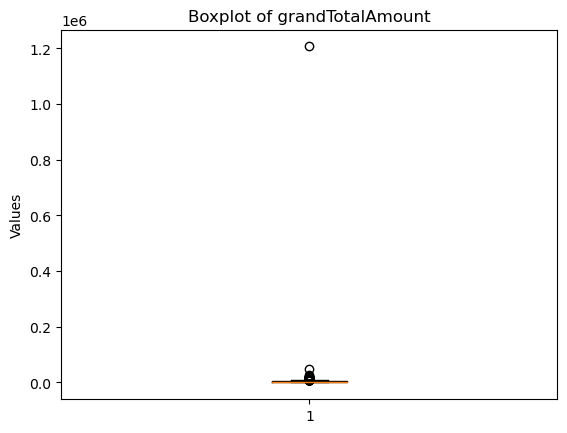

Minimum values:
0

Maximum values:
1207200


In [50]:
plt.boxplot(df["grandTotalAmount"])
plt.title(f"Boxplot of grandTotalAmount")
plt.ylabel("Values")
plt.show()

# Calculate the minimum and maximum values
min_values = df["grandTotalAmount"].min()
max_values = df["grandTotalAmount"].max()

# Print the minimum and maximum values
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

The GrandTotalAmount represents the total cost of each order. To identify outliers in this column, we visualize the distribution using a box plot. We observe that there are some extreme values, including an order with a value of £1,207,200, which seems highly unlikely.

In [51]:
# Find the top 5 largest orders in terms of grandTotalAmount
top_5_orders = df['grandTotalAmount'].nlargest(5)

# Print the result
print("The top 5 largest orders based on the 'grandTotalAmount' column:")
print(top_5_orders)

The top 5 largest orders based on the 'grandTotalAmount' column:
951     1207200
926       48000
803       25398
2305      23957
2101      21261
Name: grandTotalAmount, dtype: int64


Meanwhile, we can see that the rest of the subsequent largest values in this column appear to be more consistent and within a reasonable range. Although these values might represent orders with relatively high values, they could still be valid and provide meaningful observations.

On the other hand, values of 0 are also not possible. These can be removed based on the assumption that either no transaction or an error occurred.

In [52]:
# Count the number of orders with 0 grandTotalAmount
zero_amount_count = (df['grandTotalAmount'] == 0).sum()

print("Number of orders with grandTotalAmount = 0:", zero_amount_count)

Number of orders with grandTotalAmount = 0: 53


In [53]:
df = df[df['grandTotalAmount'] != 1207200]
df = df[df['grandTotalAmount'] != 0]

In [54]:
df.shape

(2247, 23)

**estimatedDistance**

Let's see what the distribution of the estimatedDistance column looks like to find any extreme outliers.

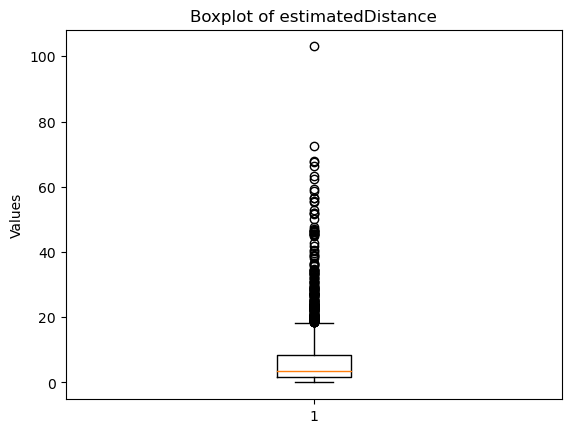

Minimum values:
0.0

Maximum values:
103.0


In [55]:
plt.boxplot(df["estimatedDistance"])
plt.title(f"Boxplot of estimatedDistance")
plt.ylabel("Values")
plt.show()

# Calculate the minimum and maximum values
min_values = df["estimatedDistance"].min()
max_values = df["estimatedDistance"].max()

# Print the minimum and maximum values
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

The estimatedDistance column represents the estimated distance for each delivery. To identify outliers in this column, we visualize the distribution using a box plot. We observe an unusually large maximum value (103.0), suggesting an extreme outlier. 

In [56]:
# Find the top 5 largest orders in terms of estimatedDistance
top_5_orders = df['estimatedDistance'].nlargest(5)

# Print the result
print("The top 5 largest orders based on the 'estimatedDistance' column:")
print(top_5_orders)

The top 5 largest orders based on the 'estimatedDistance' column:
3238    103.0
2043     72.5
972      67.8
955      67.5
1027     66.4
Name: estimatedDistance, dtype: float64


In [57]:
# Count the number of orders with 0 grandTotalAmount
zero_amount_count = (df['estimatedDistance'] == 0).sum()

print("Number of orders with estimatedDistance = 0:", zero_amount_count)

Number of orders with estimatedDistance = 0: 1


Again, the estimatedDistance column has an unusually large maximum value compared to the subsequent largest values, suggesting it contains an extreme outlier. Meanwhile, we can see that the rest of the subsequent largest values in this column appear to be more consistent and within a reasonable range. Although these values might represent orders with relatively large distances, they could still be valid and provide meaningful observations. Values of 0 were also identified and removed based on the assumption that either no transaction or an error occurred.

In [58]:
df = df[df['estimatedDistance'] != 0]
df = df[df['estimatedDistance'] != 103.0]

In [59]:
df.shape

(2245, 23)

**vehicleEfficiency**

Let's see what the distribution of the vehicleEfficiency column looks like to find any extreme outliers.

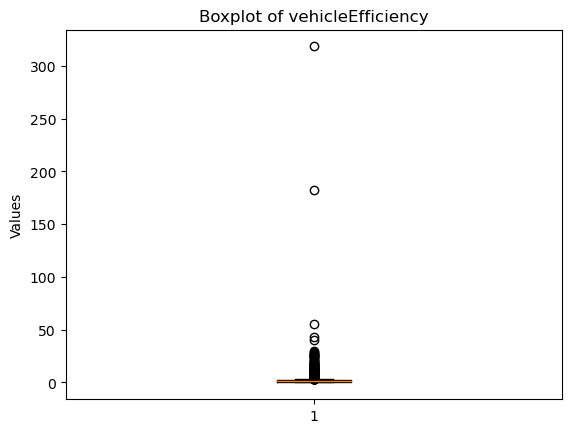

Minimum values:
0.0

Maximum values:
318.462


In [60]:
plt.boxplot(df["vehicleEfficiency"])
plt.title(f"Boxplot of vehicleEfficiency")
plt.ylabel("Values")
plt.show()

# Calculate the minimum and maximum values
min_values = df["vehicleEfficiency"].min()
max_values = df["vehicleEfficiency"].max()

# Print the minimum and maximum values
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

In [61]:
# Find the top 5 largest orders in terms of vehicleEfficiency
top_5_orders = df['vehicleEfficiency'].nlargest(5)

# Print the result
print("The top 5 largest orders based on the 'vehicleEfficiency' column:")
print(top_5_orders)

The top 5 largest orders based on the 'vehicleEfficiency' column:
657     318.4620
656     182.0000
1782     55.8333
1050     43.0000
2004     40.1667
Name: vehicleEfficiency, dtype: float64


In [62]:
# Count the number of orders with 0 grandTotalAmount
zero_amount_count = (df['vehicleEfficiency'] == 0).sum()

print("Number of orders with vehicleEfficiency = 0:", zero_amount_count)

Number of orders with vehicleEfficiency = 0: 26


The vehicleEfficiency column represents the efficiency of the delivery vehicle. To identify outliers in this column, we visualize the distribution using a box plot. We observe two unusually large maximum values (318.462 and 182.000) compared to the subsequent largest values, indicating the presence of extreme outliers. Meanwhile, we can see that the rest of the subsequent largest values in this column (third, fourth, and fifth) appear to be more consistent and within a reasonable range. Although these values might represent orders with relatively large distances, they could still be valid and provide meaningful observations. Values of 0 were also identified and removed based on the assumption that either no transaction or an error occurred.

In [63]:
df = df[df['vehicleEfficiency'] != 318.4620]
df = df[df['vehicleEfficiency'] != 182.0000]
df = df[df['vehicleEfficiency'] != 0]

In [64]:
df.shape

(2217, 23)

After completing these steps, we are left with a dataset containing 2,217 rows and 23 columns. These columns represent various features, such as order details, package information, delivery metrics, and other relevant data. The removal of outliers and handling of missing values have improved the data quality, making it more suitable for further analysis and modeling tasks.

In [65]:
df.columns

Index(['orderID', 'businessType', 'dateOnly', 'timeOnly',
       'packageCategoryName', 'packageName', 'packageDimensions',
       'numberOfDropoffs', 'addressOfSender', 'estimatedDistance',
       'differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes',
       'differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes',
       'differenceBetweenOrderPlacementAndConfirmationTimeInMinutes',
       'differenceBetweenOrderConfirmationAndPickUpTimeInMinutes',
       'collectionDurationInMinutes', 'vehicleEfficiency', 'co2SavedInGrams',
       'grandTotalAmount', 'isExpressDelivery', 'isMultidropCourierOrder',
       'returns', 'dropoffs', 'senderAddress'],
      dtype='object')

# 3. Data Pre-Processing<a class="anchor" id="Processing"></a>

Following the data cleaning, some variables still require processing to prepare the data for further analysis.


## Data Transformation<a class="anchor" id="Transformation"></a>

**Column Headings**

Firstly, some of the original column names were unclear as they included many unnecessary words. Therefore, modifications can be made to the column names to make them more concise, descriptive, and easier to understand without having to refer back to the documentation. To address this, we create a dictionary new_names that maps the original column names to more concise and descriptive names. Then, we use the rename function to apply these new column names to the DataFrame.



The following column headings are quite long and can be transformed for simplification purposes:

- differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes
- differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes
- differenceBetweenOrderPlacementAndConfirmationTimeInMinutes
- differenceBetweenOrderConfirmationAndPickUpTimeInMinutes	

In [66]:
new_names = {
    'differenceBetweenOrderOnTheWayAndFulfillmentTimeInMinutes': 'timeInTransitInMinutes',
    'differenceBetweenOrderPlacementAndFulfillmentTimeInMinutes': 'totalOrderDurationInMinutes',
    'differenceBetweenOrderPlacementAndConfirmationTimeInMinutes': 'confirmationTimeInMinutes',
    'differenceBetweenOrderConfirmationAndPickUpTimeInMinutes': 'timeConfirmationToPickupInMinutes',
    'numberOfDropoffs':'numberOfPackages',
    'returns':'numberOfReturns',
    'dropoffs':'numberOfDropoffs',
    'packageCategoryName':'business_vs_Customer'
    
}

df = df.rename(columns=new_names)

**dropoffs, returns, and packages**

The company also explained that the dropoffs and returns columns have some errors. For single-drop orders, the system filled in values of 0 for both the dropoffs and returns column as this was only coded for multi-drop orders. However, these orders still had a package (i.e., the numberOfPackages = 1), which means that the dropoff should equal to 1 as well. Therefore, all orders where dropoffs and returns = 0 but numberOfPackages = 1, the dropoffs column needs to be imputed with a value of 1 instead.

In [67]:
df.columns

Index(['orderID', 'businessType', 'dateOnly', 'timeOnly',
       'business_vs_Customer', 'packageName', 'packageDimensions',
       'numberOfPackages', 'addressOfSender', 'estimatedDistance',
       'timeInTransitInMinutes', 'totalOrderDurationInMinutes',
       'confirmationTimeInMinutes', 'timeConfirmationToPickupInMinutes',
       'collectionDurationInMinutes', 'vehicleEfficiency', 'co2SavedInGrams',
       'grandTotalAmount', 'isExpressDelivery', 'isMultidropCourierOrder',
       'numberOfReturns', 'numberOfDropoffs', 'senderAddress'],
      dtype='object')

In [68]:
df.loc[(df['numberOfDropoffs'] == 0) & (df['numberOfReturns'] == 0) & (df['numberOfPackages'] == 1), 'numberOfDropoffs'] = 1

**Price**

The 'grandTotalAmount' column represents the total amount of the order in pence. To make the values more intuitive and easier to interpret, we transform this column by dividing all values by 100, effectively converting the amounts to pounds.

In [69]:
df['grandTotalAmount(£)']= df['grandTotalAmount'] / 100
df = df.drop(columns=['grandTotalAmount'])

**co2SavedInGrams**

The 'co2SavedInGrams' column represents the amount of CO2 saved in grams for each order. To make the values more manageable, we transform this column by dividing all values by 1000, converting them to kilograms.

In [70]:
df['co2SavedInKG']= df['co2SavedInGrams'] / 1000
df = df.drop(columns=['co2SavedInGrams'])

**packageCategoryName**

In [71]:
unique_values = df['business_vs_Customer'].unique()
print(unique_values)

['businesses-limited' 'Other' 'customers-2']


The 'business_vs_Customer' column contains different values related to package categories, such as 'businesses', 'customers', 'customers-2', 'businesses-limited', and 'Other'. These values are not standardized and can be ambiguous. To simplify the categorization, we group these values into three broader categories: 'business', 'customer', and 'other' based on their descriptions.

In [72]:
# Replace the original values with the new values
df['business_vs_Customer'] = df['business_vs_Customer'].replace({
    'businesses': 'business',
    'businesses-limited': 'business',
    'customers': 'customer',
    'customers-2': 'customer',
    'Other': 'other'
})

## Feature Engineering<a class="anchor" id="Engineering"></a>

Feature engineering involves creating new features from existing variables to provide additional insights or capture meaningful patterns in the data.

**packageName and packageDimensions**

In [73]:
unique_values = df['packageName'].unique()
print(unique_values)

['Envelope (up to 3)' 'Shopping bag' 'Other' 'Small box']


In [74]:
unique_values = df['packageDimensions'].unique()
print(unique_values)

['Length/Width/Height -- 30cm/21cm/2.5cm'
 'Length/Width/Height -- 35cm/25cm/35cm' 'Other'
 'Length/Width/Height -- 35cm/26cm/42cm']


The packageName and packageDimensions values both provide similar information about the size and type of the package, meaning it is redundant to keep both. Instead, regrouping the orders by volume will allow us to extract a more meaningful feature useful for further analysis.

The packageDimensions column provides information on the size of the package in the format "Length/Width/Height -- xxcm/xxcm/xxcm". The dimensions were therefore extracted using regular expressions, allowing the volume of each package to be calculated by multiplying the length, width, and height together. For consistency, any packages with a value of 'Other' in the packageDimensions column were set to 'Other' in the volume column.

In [75]:
def calculate_volume(row):
    dimensions = row['packageDimensions']
    if dimensions == 'Other':
        return 'Other'
    else:
        regex = r"(\d+\.?\d*)cm\/(\d+\.?\d*)cm\/(\d+\.?\d*)cm"
        matches = re.search(regex, dimensions)
        if matches:
            length = float(matches.group(1))
            width = float(matches.group(2))
            height = float(matches.group(3))
            volume = length * width * height
            return round(volume, 2)
        else:
            return None

df['volume'] = df.apply(calculate_volume, axis=1)
df.head()

,orderID,businessType,dateOnly,timeOnly,business_vs_Customer,packageName,packageDimensions,numberOfPackages,addressOfSender,estimatedDistance,...,collectionDurationInMinutes,vehicleEfficiency,isExpressDelivery,isMultidropCourierOrder,numberOfReturns,numberOfDropoffs,senderAddress,grandTotalAmount(£),co2SavedInKG,volume
550,1625,Pharmacy,2021-11-01,10:09:07,business,Envelope (up to 3),Length/Width/Height -- 30cm/21cm/2.5cm,1,"105, Lupus Street, London, Greater London, SW1...",2.5,...,0.0,0.611111,1.0,0,0,1,"105, , Lupus Street, SW1V 3EN",9.88,0.570,1575.0
552,1627,Pharmacy,2021-11-01,16:49:38,business,Envelope (up to 3),Length/Width/Height -- 30cm/21cm/2.5cm,1,"Medicine Chest, 415, 413 King's Road, London,...",3.0,...,0.0,0.833333,0.0,0,0,1,"415, Medicine Chest, 413 King's Road, SW10 0LR",8.09,0.684,1575.0
553,1629,Pharmacy,2021-11-02,12:59:35,business,Envelope (up to 3),Length/Width/Height -- 30cm/21cm/2.5cm,1,"Medicine Chest, 415, 413 King's Road, London,...",3.0,...,0.0,0.833333,1.0,0,0,1,"415, Medicine Chest, 413 King's Road, SW10 0LR",12.12,0.684,1575.0
554,1630,Pharmacy,2021-11-02,14:10:49,business,Envelope (up to 3),Length/Width/Height -- 30cm/21cm/2.5cm,1,"Oza Chemist, 9, Fulham Broadway, London, Great...",3.9,...,0.0,4.333330,0.0,0,0,1,"9, Oza Chemist, Fulham Broadway, SW6 1AA",9.59,0.889,1575.0
555,1631,Pharmacy,2021-11-02,17:03:41,business,Envelope (up to 3),Length/Width/Height -- 30cm/21cm/2.5cm,1,"413, King's Road, London, Greater London, SW10...",3.0,...,0.0,1.000000,1.0,0,0,1,"413, , King's Road, SW10 0LR",12.12,0.684,1575.0


Next, the volumes were grouped into four categories: ‘Small’, ‘Medium’, ‘Large’, and ‘Other’ based on appropriate cutoff thresholds. This transformation allows for a simplified and more meaningful representation of the package size information, enabling more efficient and effective analysis of the data.

In [76]:
def get_volume_category(volume):
    if volume == 'Other':
        return 'Other'
    elif volume < 10000:
        return 'Small'
    elif volume < 40000:
        return 'Medium'
    else:
        return 'Large'

In [77]:
df['volume_category'] = df['volume'].apply(get_volume_category)

In [78]:
unique_values = df['volume_category'].unique()
print(unique_values)

['Small' 'Medium' 'Other']


In [79]:
df = df.drop(columns=['packageName','packageDimensions','volume'])

**senderAddress**

Similarly, extracting the postcodes from the address fields can help simplify the process of identifying geographic patterns in the location of the sender. The senderAddress column is formatted in a better way than the addressOfSender column to extract the postcodes.

In [80]:
df = df.drop(columns=['addressOfSender'])

In [81]:
# Extract postcodes
df['sender_postcodes'] = df['senderAddress'].str.extract(r'([A-Z]{1,2}\d{1,2}\s\d[A-Z]{2})')
df = df.drop(columns = ['senderAddress'])

In [82]:
# Check for missing values after this transformation
missing_values = df['sender_postcodes'].isnull().sum()

# Print the number of missing values
print("Number of missing values in sender_postcodes column:", missing_values)

Number of missing values in sender_postcodes column: 15


So this process generated some missing values, most likely due to errors in the senderAddress column.

In [83]:
df.dropna(subset=['sender_postcodes'], inplace=True)

# Verify the changes
print("Number of rows after dropping missing values:", len(df))

Number of rows after dropping missing values: 2202


Now, we have this other file containing more information on the latitude, longitude and region of each postcode district.

In [84]:
postcode_data = pd.read_csv('postcode-districts.csv')
postcode_data.head()

,Postcode,Latitude,Longitude,Easting,Northing,Grid Reference,Town/Area,Region,Postcodes,Active postcodes,Population,Households,Nearby districts
0,AB1,57.1269,-2.13644,391839.0,804005.0,NJ918040,Aberdeen,Aberdeen,2655.0,0.0,NaN,NaN,"AB10, AB15, AB9, AB25, AB2, AB12, AB16, AB11, ..."
1,AB2,57.1713,-2.14152,391541.0,808948.0,NJ915089,Aberdeen,Aberdeen,3070.0,0.0,NaN,NaN,"AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ..."
2,AB3,57.0876,-2.59624,363963.0,799780.0,NO639997,Aberdeen,Aberdeen,2168.0,0.0,NaN,NaN,"AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13..."
3,AB4,57.5343,-2.12713,392487.0,849358.0,NJ924493,"Fraserburgh, Peterhead, Macduff",Aberdeen,2956.0,0.0,NaN,NaN,"AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,..."
4,AB5,57.4652,-2.64764,361248.0,841843.0,NJ612418,"Buckie, Huntly, Inverurie",Aberdeen,3002.0,0.0,NaN,NaN,"AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51..."


First, we have to extract the corresponding district information from our postcodes:

In [85]:
df['district'] = df['sender_postcodes'].str.split(' ').str[0]
df = df.drop(columns=['sender_postcodes'])
df.head()

,orderID,businessType,dateOnly,timeOnly,business_vs_Customer,numberOfPackages,estimatedDistance,timeInTransitInMinutes,totalOrderDurationInMinutes,confirmationTimeInMinutes,...,collectionDurationInMinutes,vehicleEfficiency,isExpressDelivery,isMultidropCourierOrder,numberOfReturns,numberOfDropoffs,grandTotalAmount(£),co2SavedInKG,volume_category,district
552,1627,Pharmacy,2021-11-01,16:49:38,business,1,3.0,15,119,75,...,0.0,0.833333,0.0,0,0,1,8.09,0.684,Small,SW10
553,1629,Pharmacy,2021-11-02,12:59:35,business,1,3.0,14,58,2,...,0.0,0.833333,1.0,0,0,1,12.12,0.684,Small,SW10
554,1630,Pharmacy,2021-11-02,14:10:49,business,1,3.9,33,106,1,...,0.0,4.333330,0.0,0,0,1,9.59,0.889,Small,SW6
555,1631,Pharmacy,2021-11-02,17:03:41,business,1,3.0,17,51,10,...,0.0,1.000000,1.0,0,0,1,12.12,0.684,Small,SW10
556,1632,Pharmacy,2021-11-02,17:20:03,business,1,2.1,28,64,0,...,0.0,2.666670,0.0,0,0,1,6.59,0.479,Small,SW10


Postcodes are useful for identifying regions, and we can merge this information with another dataset containing latitude, longitude, and region information for each postcode district. 

In [86]:
# merge necessary data from the postcode_data csv
df = df.merge(postcode_data[['Postcode', 'Region']], left_on='district', right_on='Postcode', how='left')
df = df.drop(columns=['Postcode','district'])
df.head()

,orderID,businessType,dateOnly,timeOnly,business_vs_Customer,numberOfPackages,estimatedDistance,timeInTransitInMinutes,totalOrderDurationInMinutes,confirmationTimeInMinutes,...,collectionDurationInMinutes,vehicleEfficiency,isExpressDelivery,isMultidropCourierOrder,numberOfReturns,numberOfDropoffs,grandTotalAmount(£),co2SavedInKG,volume_category,Region
0,1627,Pharmacy,2021-11-01,16:49:38,business,1,3.0,15,119,75,...,0.0,0.833333,0.0,0,0,1,8.09,0.684,Small,Kensington and Chelsea
1,1629,Pharmacy,2021-11-02,12:59:35,business,1,3.0,14,58,2,...,0.0,0.833333,1.0,0,0,1,12.12,0.684,Small,Kensington and Chelsea
2,1630,Pharmacy,2021-11-02,14:10:49,business,1,3.9,33,106,1,...,0.0,4.333330,0.0,0,0,1,9.59,0.889,Small,Hammersmith and Fulham
3,1631,Pharmacy,2021-11-02,17:03:41,business,1,3.0,17,51,10,...,0.0,1.000000,1.0,0,0,1,12.12,0.684,Small,Kensington and Chelsea
4,1632,Pharmacy,2021-11-02,17:20:03,business,1,2.1,28,64,0,...,0.0,2.666670,0.0,0,0,1,6.59,0.479,Small,Kensington and Chelsea


**Date and Time**

We convert the 'dateOnly' and 'timeOnly' columns into proper date and time data types using the to_datetime function. Then, we extract additional features from the date and time information.

In [87]:
df['dateOnly'] = pd.to_datetime(df['dateOnly'])
df['timeOnly'] = pd.to_datetime(df['timeOnly']).dt.time

In [88]:
df['year'] = pd.to_datetime(df['dateOnly']).dt.year
df['month'] = pd.to_datetime(df['dateOnly']).dt.month
df['day'] = pd.to_datetime(df['dateOnly']).dt.day

We can also derive the time of day from the timeOnly variable.

In [89]:
# Extract the hour component from 'timeOnly' and assign it to 'timeOfDay'
df['timeOfDay'] = df['timeOnly'].apply(lambda x: x.hour)

In [90]:
# Define a dictionary to map hours to time of day categories
time_categories = {
    0: 'Night',
    1: 'Night',
    2: 'Night',
    3: 'Night',
    4: 'Night',
    5: 'Night',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'Afternoon',
    13: 'Afternoon',
    14: 'Afternoon',
    15: 'Afternoon',
    16: 'Afternoon',
    17: 'Afternoon',
    18: 'Evening',
    19: 'Evening',
    20: 'Evening',
    21: 'Evening',
    22: 'Evening',
    23: 'Evening'
}

# Map the hour values to the time of day categories
df['timeOfDay'] = df['timeOfDay'].map(time_categories)

Let's check if there are any odd orders.

In [91]:
# Filter the DataFrame for orders delivered at night
night_orders = df[df['timeOfDay'] == 'Night']

# Count the number of orders
num_night_orders = len(night_orders)

# Print the result
print(f"Number of orders delivered at Night: {num_night_orders}")

Number of orders delivered at Night: 1


We can remove the orders placed at 'night' based on the assumption that this must be an error as the company does not operate at night.

In [92]:
# Delete the order with timeOfDay = 'Night'
df = df[df['timeOfDay'] != 'Night']

I also want to derive the season from the dateOnly variable as this might provide useful insights. 

In [93]:
# Define a function to map the month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'Season' by applying the function to the month
df['Season'] = df['dateOnly'].dt.month.map(get_season)

In [94]:
df.head()

,orderID,businessType,dateOnly,timeOnly,business_vs_Customer,numberOfPackages,estimatedDistance,timeInTransitInMinutes,totalOrderDurationInMinutes,confirmationTimeInMinutes,...,numberOfDropoffs,grandTotalAmount(£),co2SavedInKG,volume_category,Region,year,month,day,timeOfDay,Season
0,1627,Pharmacy,2021-11-01,16:49:38,business,1,3.0,15,119,75,...,1,8.09,0.684,Small,Kensington and Chelsea,2021,11,1,Afternoon,Autumn
1,1629,Pharmacy,2021-11-02,12:59:35,business,1,3.0,14,58,2,...,1,12.12,0.684,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn
2,1630,Pharmacy,2021-11-02,14:10:49,business,1,3.9,33,106,1,...,1,9.59,0.889,Small,Hammersmith and Fulham,2021,11,2,Afternoon,Autumn
3,1631,Pharmacy,2021-11-02,17:03:41,business,1,3.0,17,51,10,...,1,12.12,0.684,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn
4,1632,Pharmacy,2021-11-02,17:20:03,business,1,2.1,28,64,0,...,1,6.59,0.479,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn


In [95]:
df.shape

(2201, 26)

# Save Cleaned Data to CSV<a class="anchor" id="Save"></a>

Finally, we save the cleaned DataFrame to a CSV file named 'cleaned_data.csv' for use in subsequent analysis.

In [96]:
# Save cleaned data
df.to_csv('cleaned_data.csv', index=False)